In [14]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
diabetes=load_diabetes(return_X_y=True)
X=diabetes[0]
y=diabetes[1]

In [16]:
len(X),len(y)

(442, 442)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

array([[ 0.07076875,  0.05068012,  0.01211685, ...,  0.03430886,
         0.02736405, -0.0010777 ],
       [-0.00914709,  0.05068012, -0.01806189, ...,  0.07120998,
         0.00027248,  0.01963284],
       [ 0.00538306, -0.04464164,  0.04984027, ..., -0.00259226,
         0.01703607, -0.01350402],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090325, -0.0010777 ],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845972, -0.03835666],
       [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
        -0.00514219, -0.0010777 ]])

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
def prediction_model(model):
    cv=KFold()
    model=model(cv=cv)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"The r2 score for the {model} is {r2_score(y_test,y_pred)}")
    plt.scatter(y_test,y_pred,c='g')
    plt.plot(y_test,y_test)
    

The r2 score for the RidgeCV(cv=KFold(n_splits=5, random_state=None, shuffle=False)) is 0.4572109567780849


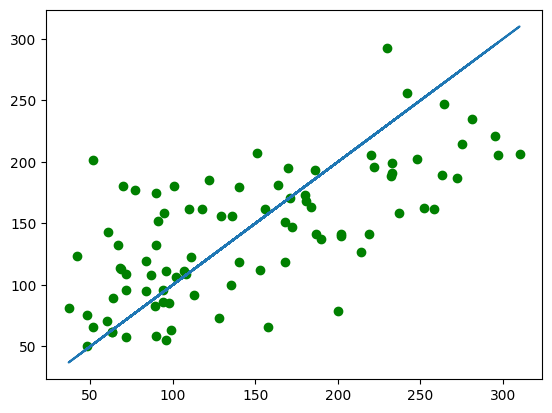

In [20]:
prediction_model(RidgeCV)

The r2 score for the LassoCV(cv=KFold(n_splits=5, random_state=None, shuffle=False)) is 0.4714218340088624


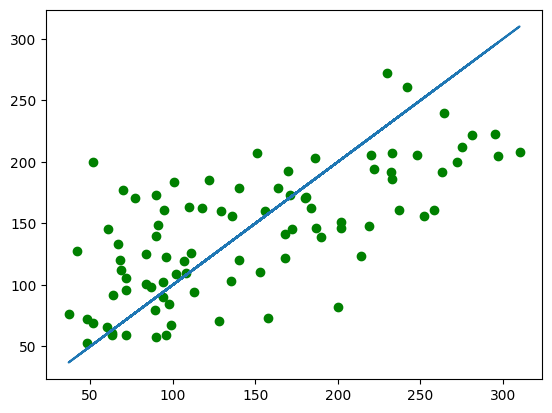

In [21]:
prediction_model(LassoCV)

### So from using linear models like ridgecv and lasso cv accuracy is not that high ,means linear model may not work 

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [25]:
treeclassifier=DecisionTreeRegressor()
param_grid={
    'criterion':['poisson', 'absolute_error', 'squared_error', 'friedman_mse'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']    
}
param_grid

{'criterion': ['poisson', 'absolute_error', 'squared_error', 'friedman_mse'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [30]:
cv=KFold()
grid=GridSearchCV(estimator=treeclassifier,param_grid=param_grid,scoring='neg_mean_squared_error',cv=cv)
grid.fit(X_train,y_train)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\mahap\OneDriv

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['poisson', 'absolute_error',
                                       'squared_error', 'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [31]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [28]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features='sqrt')

In [32]:
y_pred=grid.predict(X_test)
y_pred

array([164.66666667, 162.        , 164.66666667, 215.13559322,
       100.55921053, 100.55921053, 215.13559322, 215.13559322,
       164.66666667, 215.13559322, 100.55921053, 164.66666667,
       100.55921053, 215.13559322, 100.55921053, 162.        ,
       215.13559322, 215.13559322, 162.        , 215.13559322,
       215.13559322, 100.55921053, 100.55921053, 215.13559322,
       162.        , 215.13559322, 215.13559322, 100.55921053,
       100.55921053, 100.55921053, 215.13559322, 100.55921053,
       215.13559322, 164.66666667, 215.13559322, 215.13559322,
       100.55921053, 164.66666667, 164.66666667, 100.55921053,
       100.55921053, 100.55921053, 100.55921053, 164.66666667,
       164.66666667, 100.55921053, 100.55921053, 100.55921053,
       100.55921053, 164.66666667, 162.        , 100.55921053,
       215.13559322, 100.55921053, 164.66666667, 162.        ,
       100.55921053, 215.13559322, 100.55921053, 100.55921053,
       215.13559322, 215.13559322, 162.        , 100.55

The accuracy score for the Decision Tree regressor is  0.3520510993835342


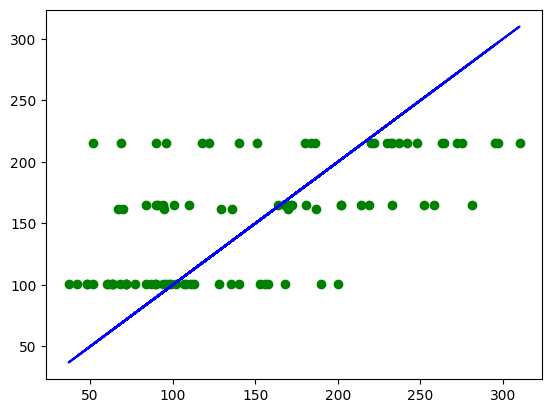

In [33]:
print(f"The accuracy score for the Decision Tree regressor is ",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred,c='g')
plt.plot(y_test,y_test,'b')

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.072\nfriedman_mse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.5, 'x[8] <= 0.104\nfriedman_mse = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 2378.339\nsamples = 152\nvalue = 100.559'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 3915.52\nsamples = 57\nvalue = 164.667'),
 Text(0.75, 0.5, 'x[7] <= -0.364\nfriedman_mse = 5119.262\nsamples = 144\nvalue = 205.542'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 5362.846\nsamples = 26\nvalue = 162.0'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 4555.812\nsamples = 118\nvalue = 215.136')]

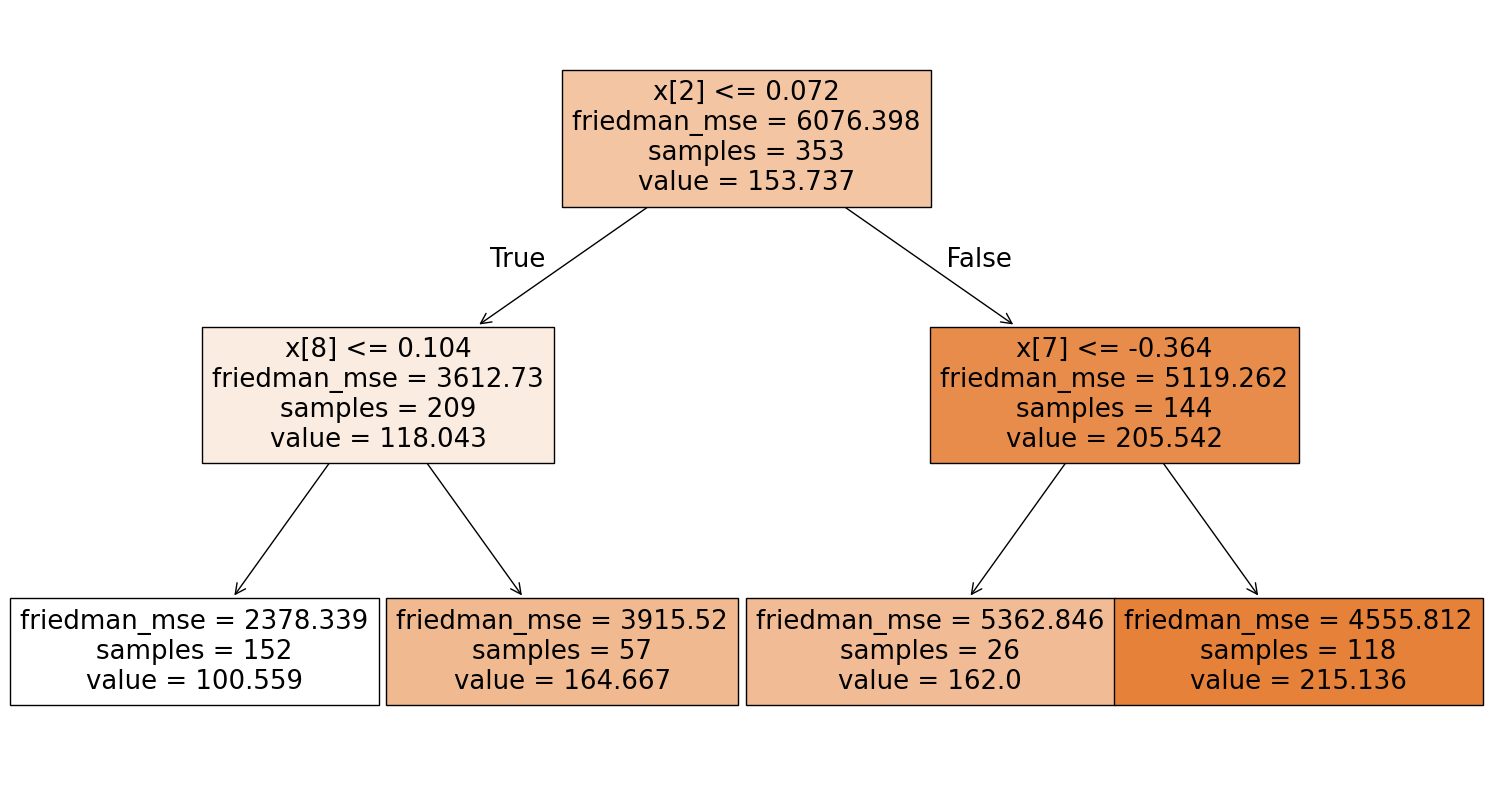

In [34]:
plt.figure(figsize=(19,10))
tree.plot_tree(grid.best_estimator_,filled=True)